In [1]:
import sys
import numpy as np
import copy
%matplotlib nbagg
import matplotlib.pyplot as plt

pulse_building_folder = 'A:\PulseBuilding'
if pulse_building_folder not in sys.path:
    sys.path.insert(0, pulse_building_folder)

from pulse_building import Waveform, Element, Sequence

### General Variables

In [2]:
cycle_duration = 10e-6
sampling_rate = 5e6
resolution = 1 / sampling_rate
pulse_end = 5e-6
marker_time = 10e-9

total_points = round(cycle_duration / resolution)
pulse_end_points = round(pulse_end / resolution)
marker_points = round(marker_time)

### Readout Settings

In [3]:
pulse_readout_delay = 50e-9
readout_start = pulse_end + pulse_readout_delay
readout_time = 4e-6

readout_start_points = round(readout_start / resolution)
readout_points = round(readout_time / resolution)

readout_waveform = Waveform(length=total_points, channel=2)
readout_waveform.wave[readout_start_points:readout_start_points + readout_points] = 1
readout_waveform.marker_1[pulse_end_points:readout_start_points + marker_points] = 1
readout_waveform.marker_2[pulse_end_points:readout_start_points + marker_points] = 1

## Rabi

In [4]:
rabi_sequence = Sequence(name='rabi',
                         variable='qubit pulse duration',
                         variable_unit='s',
                         step=1e-6,
                         start=0,
                         stop=5e-6)

qubit_duration_array_points = np.round(rabi_sequence.variable_array / resolution).astype(int)

for i, qubit_points in enumerate(qubit_duration_array_points):
    element = Element()
    element.add_waveform(readout_waveform)
    qubit_waveform = Waveform(length=total_points, channel=1)
    if i == 0:
        qubit_waveform.marker_1[:marker_points] = 1
        qubit_waveform.marker_2[:marker_points] = 1
    qubit_start = pulse_end_points - qubit_points
    qubit_end = pulse_end_points
    qubit_waveform.wave[qubit_start:qubit_end] = 1
    element.add_waveform(qubit_waveform) 
    rabi_sequence.add_element(element)

rabi_sequence.check()
print(len(rabi_sequence.variable_array))

sequence check passed: 6 elements
6


## T1

In [5]:
t1_sequence = Sequence(name='t1',
                       variable='pi pulse readout delay',
                       variable_unit='s',
                       step=0.5e-6,
                       start=0,
                       stop=20e-6)

qubit_time = 1e-6
qubit_points = round(qubit_time / resolution)
delay_array_points = np.round(t1_sequence.variable_array / resolution).astype(np.int)

for i, delay_points in enumerate(delay_array_points):
    element = Element()
    element.add_waveform(readout_waveform)
    qubit_waveform = Waveform(length=points, channel=1)
    if i == 0:
        qubit_waveform.marker_1[0:100] = 1
        qubit_waveform.marker_2[0:100] = 1
    qubit_start = pulse_end_points - delay_points - qubit_points
    qubit_end = pulse_end_points - delay_points
    qubit_waveform.wave[qubit_start:qubit_end] = 1
    element.add_waveform(qubit_waveform) 
    t1_sequence.add_element(element)

t1_sequence.check()

NameError: name 'points' is not defined

## SSB

In [8]:
ssb_sequence = Sequence(name='ssb',
                       variable=' diff down from f0',
                       variable_unit='GHz',
                       step=1e6,
                       start=0,
                       stop=200e6)

qubit_time = 1e-6
qubit_points = round(qubit_time / resolution)
qubit_time_array = np.arange(qubit_points) * resolution
freq_array = ssb_sequence.variable_array

for i, freq in enumerate(freq_array):
    element = Element()
    element.add_waveform(readout_waveform)
    qubit_i = Waveform(length=points, channel=1)
    qubit_q = Waveform(length=points, channel=2)
    if i == 0:
        qubit_i.marker_1[0:100] = 1
        qubit_i.marker_2[0:100] = 1
    qubit_start = pulse_end_points - qubit_points
    qubit_end = pulse_end_points
    angle = qubit_time_array * freq * 2 * np.pi
    cos_array = np.cos(angle)
    sin_array = np.sin(angle)
    qubit_i.wave[qubit_start:qubit_end] = cos_array
    qubit_q.wave[qubit_start:qubit_end] = sin_array
    element.add_waveform(qubit_i)
    element.add_waveform(qubit_q)
    ssb_sequence.add_element(element)

ssb_sequence.check()

sequence check passed: 201 elements


True

## Readout SSB

In [9]:
ssb_sequence = Sequence(name='ssb',
                       variable=' diff down from f0',
                       variable_unit='GHz',
                       step=1e6,
                       start=0,
                       stop=100e6)

qubit_time = 1e-6
qubit_points = round(qubit_time / resolution)
qubit_time_array = np.arange(qubit_points) * resolution
freq_array = ssb_sequence.variable_array

for i, freq in enumerate(freq_array):
    element = Element()
    element.add_waveform(readout_waveform)
    qubit_i = Waveform(length=points, channel=1)
    qubit_q = Waveform(length=points, channel=2)
    if i == 0:
        qubit_i.marker_1[0:100] = 1
        qubit_waveform.marker_2[0:100] = 1
    qubit_start = pulse_end_points - qubit_points
    qubit_end = pulse_end_points
    angle = qubit_time_array * freq * 2 * np.pi
    cos_array = np.cos(angle)
    sin_array = np.sin(angle)
    qubit_i.wave[qubit_start:qubit_end] = cos_array
    qubit_q.wave[qubit_start:qubit_end] = sin_array
    element.add_waveform(qubit_i)
    element.add_waveform(qubit_q)
    ssb_sequence.add_element(element)

ssb_sequence.check()

sequence check passed: 101 elements


True

## Plot Sequence

<IPython.core.display.Javascript object>


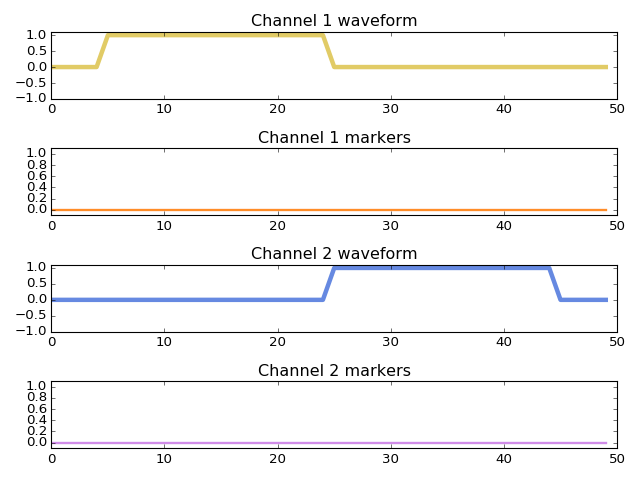

In [5]:
sequence = rabi_sequence # choose which sequence to plot
elemnum = 4 # choose which element to plot
chan_a, chan_b  = 1, 2 # choose which two channels to plot

fig = plt.figure()

ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
ax1.set_title('Channel {} waveform'.format(chan_a))
ax1.set_ylim([-1, 1.1])
ax2.set_title('Channel {} markers'.format(chan_a))
ax2.set_ylim([-0.1, 1.1])
ax3.set_title('Channel {} waveform'.format(chan_b))
ax3.set_ylim([-1, 1.1])
ax4.set_title('Channel {} markers'.format(chan_b))
ax4.set_ylim([-0.1, 1.1])


ax1.plot(sequence[elemnum][chan_a].wave, lw=4, color='#e1cb66')
ax2.plot(sequence[elemnum][chan_a].marker_1, lw=2, color='#FF4500', alpha=0.6)
ax2.plot(sequence[elemnum][chan_a].marker_2, lw=2, color='#FF8C00', alpha=0.6)

ax3.plot(sequence[elemnum][chan_b].wave, lw=4, color='#6689e1')
ax4.plot(sequence[elemnum][chan_b].marker_1, lw=2, color='#6A5ACD', alpha=0.6)
ax4.plot(sequence[elemnum][chan_b].marker_2, lw=2, color='#EE82EE', alpha=0.6)

plt.tight_layout()

## Upload to AWG

In [8]:
rabi_sequence.unwrap_4dsp()

In [34]:
(waveforms, m1s, m2s ,nreps, trig_waits, goto_states, jump_tos, chans) = rabi_sequence.unwrap()

In [7]:
import qcodes.instrument_drivers.tektronix.AWG5014 as awg
awg1 = awg.Tektronix_AWG5014('AWG1', 'TCPIP0::192.168.137.72::inst0::INSTR', timeout=40)

Connected to: TEKTRONIX AWG5014C (serial:B010169, firmware:SCPI:99.0 FW:4.2.0.27) in 0.24s


In [23]:
awg1.make_send_and_load_awg_file(waveforms, m1s, m2s, 
                                 nreps, trig_waits,
                                 goto_states, jump_tos, chans)

In [24]:
awg1.all_channels_on()
awg1.run()

'Idle'

In [33]:
len(rabi_sequence[0])

2

In [22]:
nreps

[2, 2, 2, 2, 2, 2]

In [25]:

noofseqelems = 6
noofpoints = 1200
waveforms = [[], []]  # one list for each channel
m1s = [[], []]
m2s = [[], []]
for ii in range(noofseqelems):
    # waveform and markers for channel 1
    waveforms[0].append(np.sin(np.pi*(ii+1)*np.linspace(0, 1, noofpoints))*np.hanning(noofpoints))
    m1 = np.zeros(noofpoints)
    m1[:int(noofpoints/(ii+1))] = 1
    m1s[0].append(m1)
    m2 = np.zeros(noofpoints)
    m2s[0].append(m2)
    
    # waveform and markers for channel two
    wf = np.sin(np.pi*(ii+1)*np.linspace(0, 1, noofpoints))
    wf *= np.arctan(np.linspace(-20, 20, noofpoints))/np.pi*2
    waveforms[1].append(wf)
    m1 = np.zeros(noofpoints)
    m1[:int(noofpoints/(ii+1))] = 1
    m1s[1].append(m1)
    m2 = np.zeros(noofpoints)
    m2s[1].append(m2)

In [26]:

# Sequencing options

# number of repetitions
nreps = [2 for ii in range(noofseqelems)]
# Wait trigger (0 or 1)
trig_waits = [0]*noofseqelems
# Goto state
goto_states = [((ii+1) % noofseqelems)+1 for ii in range(noofseqelems)]
#goto_states = [0]*noofseqelems
# Event jump
jump_tos = [2]*noofseqelems

In [27]:
awg1.make_send_and_load_awg_file(waveforms, m1s, m2s, 
                                 nreps, trig_waits,
                                 goto_states, jump_tos, channels=[1, 3])

In [29]:
len(waveforms)

2